In [1]:
## Import necessary modules
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
import seaborn as sns
from scipy import stats

In [2]:
## load data
cov_df = pd.read_csv('owid-covid-data.csv')

In [3]:
## get 5 countries with highest death rates
end_date_df = cov_df[cov_df['date'] == '2023-08-02']
deaths_sorted_df = end_date_df.sort_values(by=['total_deaths_per_million'],ascending=False)
deaths_sorted_df[['iso_code','location','total_deaths_per_million']].head(5)

iso_code                location  total_deaths_per_million
231572      PER                    Peru                  6501.224
44487       BGR                Bulgaria                  5661.494
37947       BIH  Bosnia and Herzegovina                  5057.012
130721      HUN                 Hungary                  4895.908
215254      MKD         North Macedonia                  4748.267

In [4]:
## set x ticks for time plots
month_len = [90,91,92,92]
x_tks = {}
dates = cov_df['date'].unique()
x_tks = {0:dates[0][:7], 89:dates[89][:7]}

i = 180
j = 2
while i<len(dates):
    x_tks.update({i: dates[i][:7]})
    i += month_len[j%4]
    j += 1

In [5]:
## get Data for top 5 countries
per_df = cov_df[cov_df['iso_code'] == 'PER'].copy().reset_index()
bgr_df = cov_df[cov_df['iso_code'] == 'BGR'].copy().reset_index()
bih_df = cov_df[cov_df['iso_code'] == 'BIH'].copy().reset_index()
hun_df = cov_df[cov_df['iso_code'] == 'HUN'].copy().reset_index()
mkd_df = cov_df[cov_df['iso_code'] == 'MKD'].copy().reset_index()

cntry_dfs = [per_df,bgr_df,bih_df,hun_df,mkd_df]
cntrs = ['Peru','Bulgaria','Bosnia and Herzogovina','Hungary', 'North Makedonia']
colors = ['maroon','green','darkblue','red','orange']

In [6]:
## compute worldwide averages over the used parameters
wrld_df = cov_df[cov_df['iso_code'] == 'OWID_WRL'].copy()
newCases_wrl = wrld_df['new_cases_smoothed_per_million'].copy()
newDeaths_wrl = wrld_df['new_deaths_smoothed_per_million'].copy()
totDeaths_wrl = wrld_df['total_deaths_per_million'].copy()
relVacc_wrl = wrld_df['people_vaccinated_per_hundred'].copy()

strngID_avg = []

dates = cov_df['date'].unique()
for date in dates:
    strng_df = cov_df[cov_df['date'] == date]['stringency_index'].copy()
    for i in range(len(strng_df)):
        if np.isnan(strng_df.iloc(0)[i]):
            strng_df.iloc(0)[i] = 0
    strngID_avg.append(sum(strng_df)/len(strng_df))

world_avgs = [newCases_wrl,strngID_avg ,newDeaths_wrl,totDeaths_wrl,relVacc_wrl]

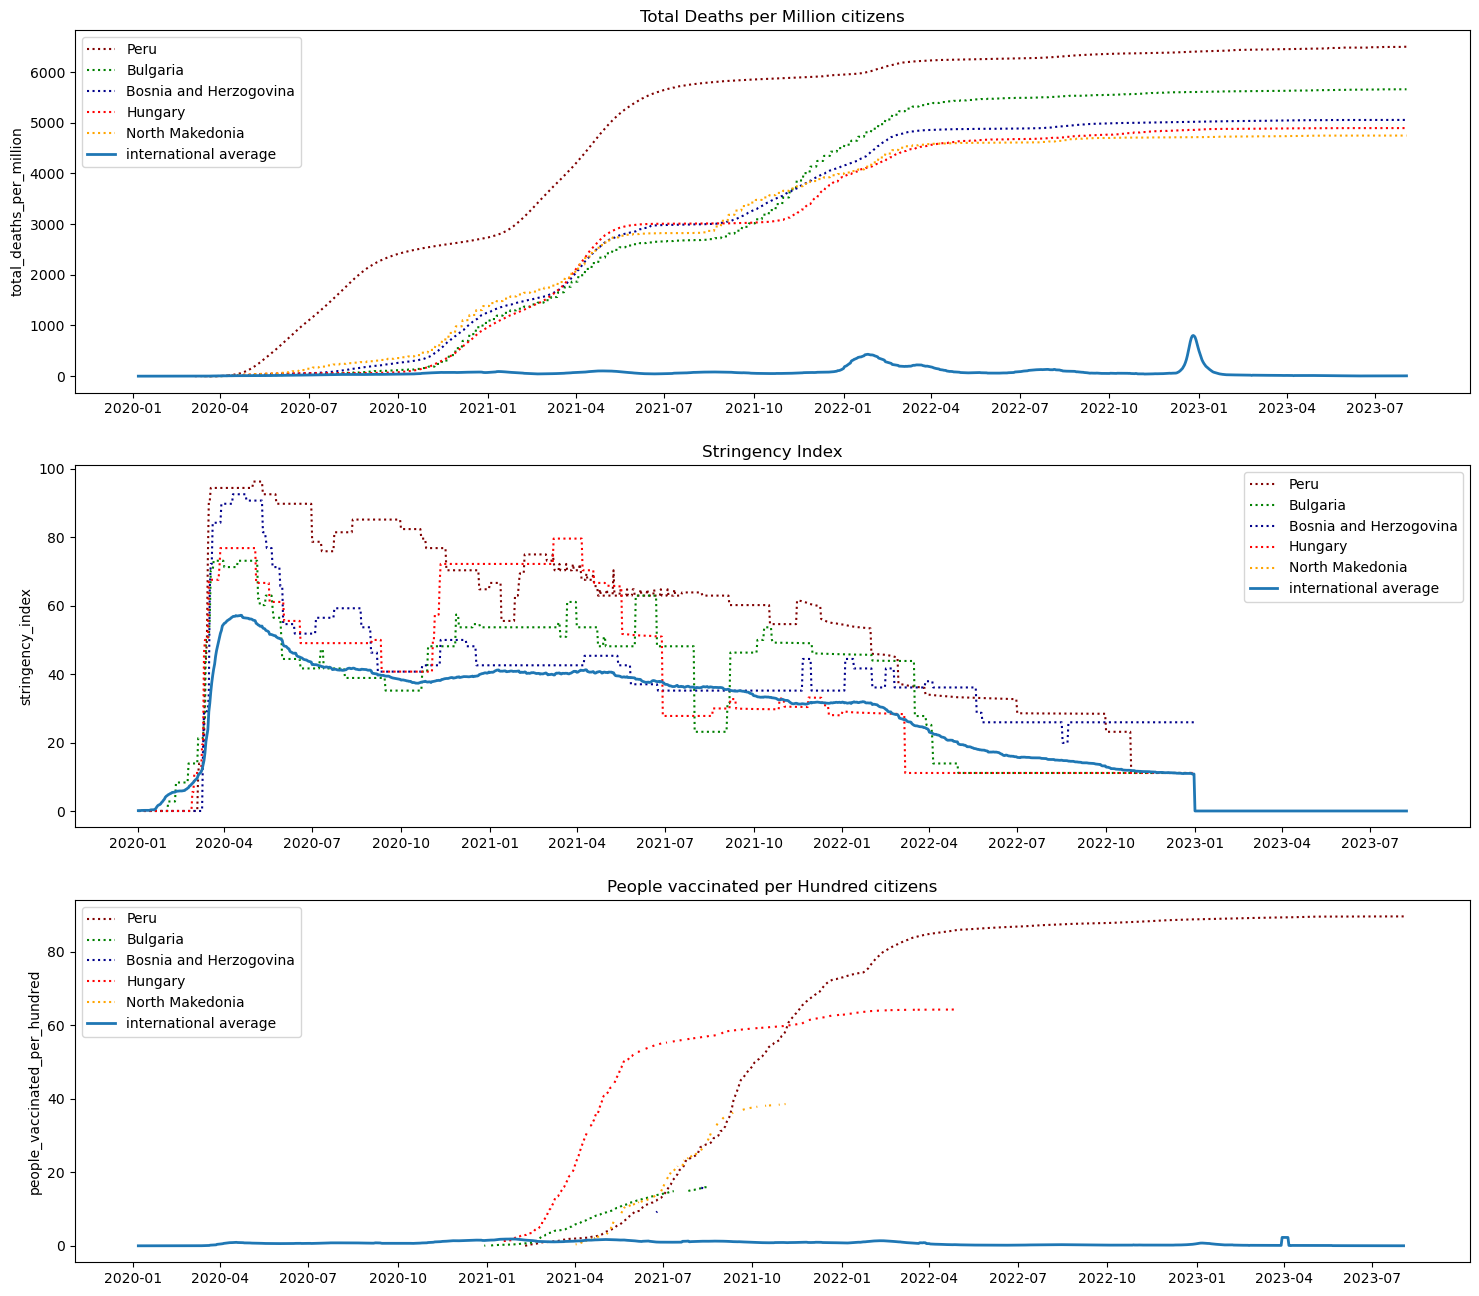

In [7]:
rows = ['total_deaths_per_million','stringency_index','people_vaccinated_per_hundred']
title = ['Total Deaths per Million citizens', 'Stringency Index', 'People vaccinated per Hundred citizens']
fig, axs = plt.subplots(len(rows), 1, figsize=(18, 16))
for i in range(len(rows)):
    for j in range(len(cntrs)):
        axs[i].plot(range(len(cntry_dfs[j])),cntry_dfs[j][rows[i]], color = colors[j], label = cntrs[j], linestyle = 'dotted')
    axs[i].plot(range(len(world_avgs[i])), world_avgs[i], label = 'international average', linewidth = 2)
    axs[i].set_ylabel(rows[i])
    axs[i].set_title(title[i])
    axs[i].set_xticks([idx for idx in x_tks], [x_tks[idx] for idx in x_tks])

    axs[i].legend()

In [9]:
## compute correlation between suitable parameters and total deaths rates per capita
corr_df = end_date_df.copy()
corr_df = corr_df.drop(columns = ['iso_code','continent','location','date'])
corr_df.fillna(corr_df.mean(), inplace=True)
corr_part_df = corr_df[['total_deaths_per_million','total_cases','total_cases_per_million','total_deaths','total_tests_per_thousand','positive_rate','tests_per_case','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy','human_development_index','population']]         
cor_matrix = corr_part_df.corr()
correlation_data = cor_matrix['total_deaths_per_million'].sort_values(ascending = False).head(6)
print(cor_matrix['total_deaths_per_million'].sort_values(ascending = False))
corr_part_df.insert(2,'iso_code',end_date_df['iso_code'],True)
corr_part_df.insert(2,'contintent',end_date_df['continent'],True)


total_deaths_per_million               1.000000
median_age                             0.644702
aged_70_older                          0.631622
aged_65_older                          0.629608
human_development_index                0.556456
life_expectancy                        0.496346
female_smokers                         0.494842
total_cases_per_million                0.460522
hospital_beds_per_thousand             0.333509
handwashing_facilities                 0.281908
gdp_per_capita                         0.268994
male_smokers                           0.121466
people_vaccinated_per_hundred          0.090198
total_deaths                           0.080663
total_cases                            0.052083
population_density                     0.023085
total_vaccinations_per_hundred         0.005126
people_fully_vaccinated_per_hundred   -0.002914
diabetes_prevalence                   -0.013931
population                            -0.060810
cardiovasc_death_rate                 -0

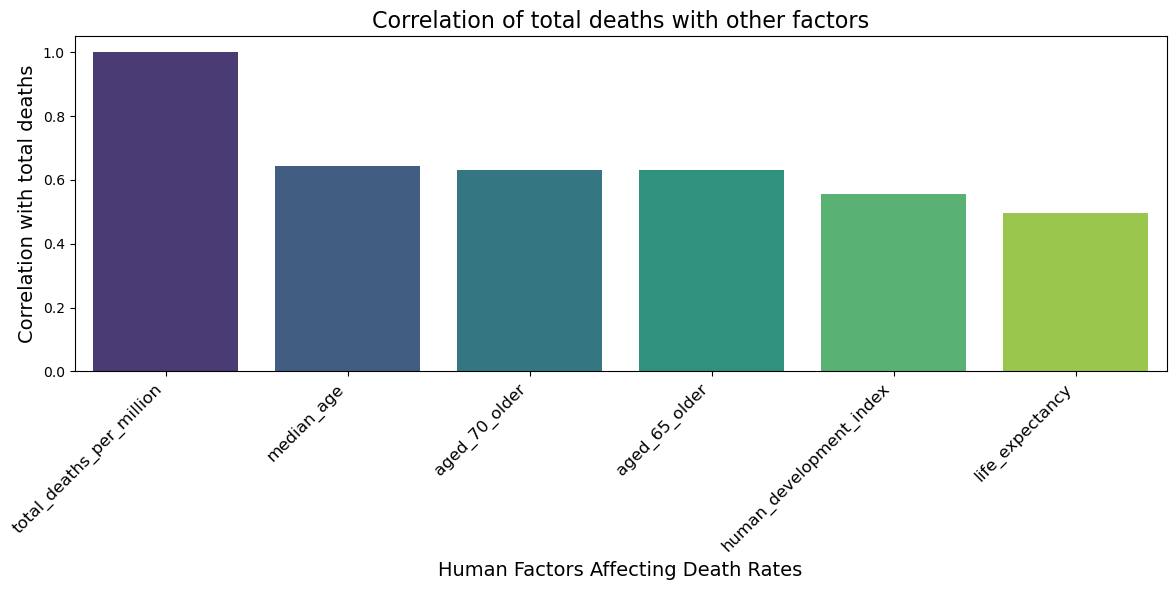

In [10]:
## show top 5 correlated parameter
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=correlation_data.index, y=correlation_data.values, palette='viridis')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Human Factors Affecting Death Rates', fontsize=14)
plt.ylabel('Correlation with total deaths', fontsize=14)
plt.title('Correlation of total deaths with other factors', fontsize=16)
plt.tight_layout() 
plt.show()

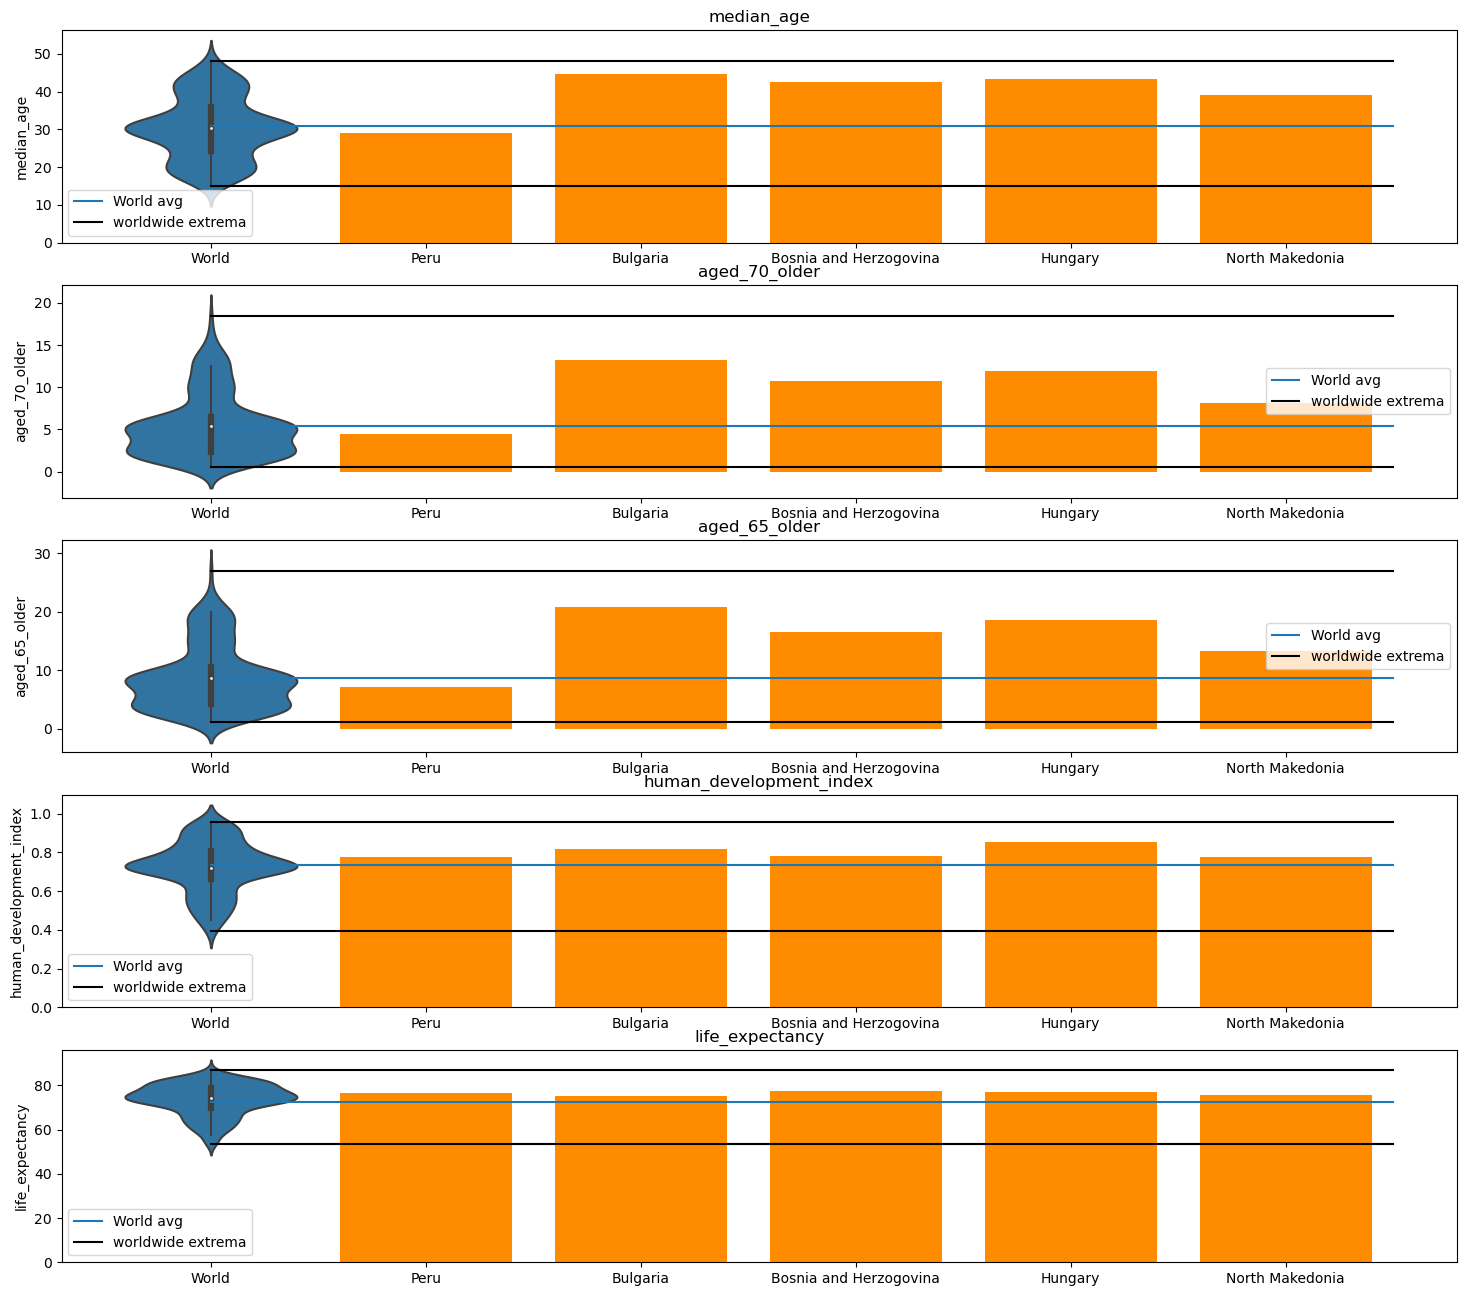

In [11]:
## Top 5 countries in comparison to world on most correlated parameters
corr_rows = correlation_data.index[1:]

world_max = []
world_min = []
world_data = []
for i in range(len(corr_rows)):
    world_data.append([])
    for data in corr_part_df[corr_rows[i]]:
        world_data[i].append(data)
    world_max.append(max(corr_part_df[corr_rows[i]]))
    world_min.append(min(corr_part_df[corr_rows[i]]))
    

fig, axs = plt.subplots(len(corr_rows), 1, figsize=(18, 16))
for i in range(len(corr_rows)):
    sns.violinplot(data = world_data[i], ax = axs[i])
    for j in range(len(cntrs)):
        axs[i].bar(j+1,cntry_dfs[j][corr_rows[i]].iloc(0)[-1],color = 'darkorange')
    axs[i].set_xticks(range(len(cntrs)+1),['World']+cntrs)
    axs[i].plot(np.linspace(-0,5.5,6),np.ones(6)*float(corr_part_df[corr_part_df['iso_code'] == 'OWID_WRL'][corr_rows[i]].iloc[0]),label = 'World avg')
    axs[i].plot(np.linspace(-0,5.5,6),np.ones(6)*world_max[i],label = 'worldwide extrema',color = 'black')
    axs[i].plot(np.linspace(-0,5.5,6),np.ones(6)*world_min[i],color = 'black')
    axs[i].set_title(corr_rows[i])

    axs[i].set_ylabel(corr_rows[i])
    axs[i].legend()

In [12]:
## take a deeper look into the neighboring countries of the top countries
## European countries
grc_df = cov_df[cov_df['iso_code'] == 'GRC'].copy().reset_index()
alb_df = cov_df[cov_df['iso_code'] == 'ALB'].copy().reset_index()
srb_df = cov_df[cov_df['iso_code'] == 'SRB'].copy().reset_index()
svn_df = cov_df[cov_df['iso_code'] == 'SVN'].copy().reset_index()
hrv_df = cov_df[cov_df['iso_code'] == 'HRV'].copy().reset_index()
rou_df = cov_df[cov_df['iso_code'] == 'ROU'].copy().reset_index()
svk_df = cov_df[cov_df['iso_code'] == 'SVK'].copy().reset_index()
cze_df = cov_df[cov_df['iso_code'] == 'CZE'].copy().reset_index()
mda_df = cov_df[cov_df['iso_code'] == 'MDA'].copy().reset_index()
mne_df = cov_df[cov_df['iso_code'] == 'MNE'].copy().reset_index()

eu_cntry_dfs_high = [bgr_df,bih_df,hun_df,mkd_df]
eu_cntry_dfs_mid  = [hrv_df,svn_df,mne_df,cze_df,svk_df,mda_df,grc_df,rou_df]
eu_cntry_dfs_low  = [srb_df,alb_df]
eu_cntrs_high = ['Bulgaria','Bosnia and Herzogovina','Hungary', 'North Makedonia']
eu_cntrs_low = ['Serbia','Albania']
eu_cntrs_mid = ['Croatia','Slovenia','Czechia','Slovakia','Montenegro','Moldavia','Greece','Romania']
eu_codes = ['BGR','BIH','HUN','MKD','HRV','SVN','MNE','CZE','SVK','MDA','GRC','ROU','SRB','ALB']

##South American Countries
ecu_df = cov_df[cov_df['iso_code'] == 'ECU'].copy().reset_index()
col_df = cov_df[cov_df['iso_code'] == 'COL'].copy().reset_index()
bra_df = cov_df[cov_df['iso_code'] == 'BRA'].copy().reset_index()
bol_df = cov_df[cov_df['iso_code'] == 'BOL'].copy().reset_index()
chl_df = cov_df[cov_df['iso_code'] == 'CHL'].copy().reset_index()

sam_cntry_dfs_high = [per_df]
sam_cntry_dfs_mid  = [bra_df,chl_df,col_df]
sam_cntry_dfs_low  = [ecu_df,bol_df]
sam_cntrs_high = ['Peru']
sam_cntrs_low = ['Ecuador','Bolivia']
sam_cntrs_mid = ['Brazil','Chile','Colombia']
sam_codes = ['PER','BRA','CHL', 'BOL','ECU','COL']

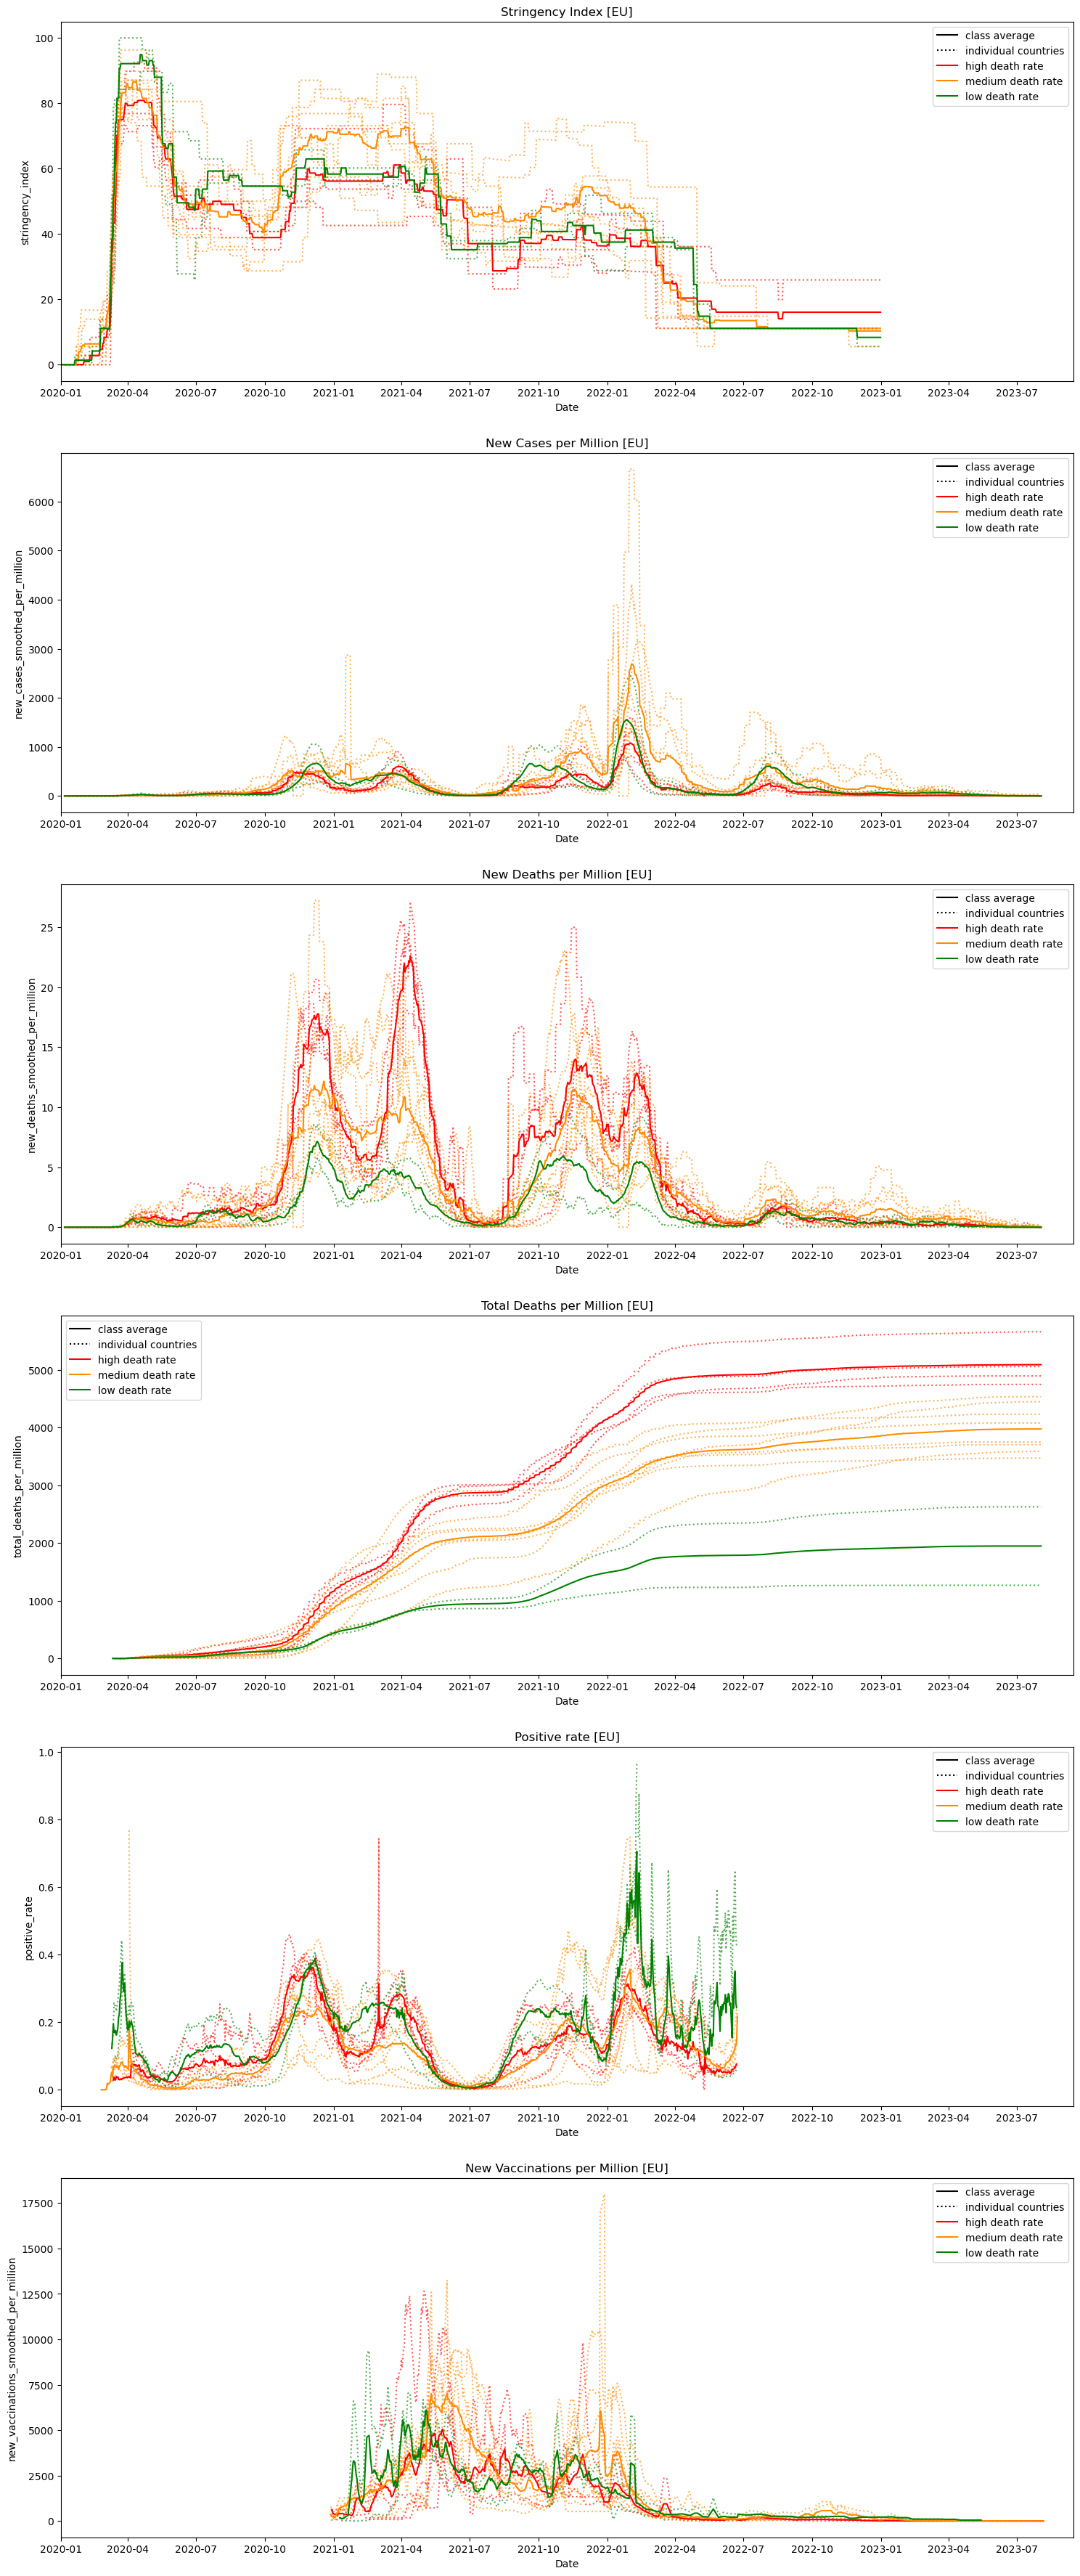

In [13]:
cols = ['stringency_index','new_cases_smoothed_per_million', 'new_deaths_smoothed_per_million', 'total_deaths_per_million',
       'positive_rate','new_vaccinations_smoothed_per_million']
title = ['Stringency Index [EU]', 'New Cases per Million [EU]', 'New Deaths per Million [EU]', 'Total Deaths per Million [EU]',
       'Positive rate [EU]','New Vaccinations per Million [EU]']
fig, axs = plt.subplots(len(cols), 1, figsize=(18, 45))
for i in range(len(cols)):
    for j in range(len(eu_cntrs_high)):
        axs[i].plot(range(len(eu_cntry_dfs_high[j])),eu_cntry_dfs_high[j][cols[i]], color = 'red', linestyle = 'dotted', alpha = 0.65)
    for j in range(len(eu_cntrs_low)):
        axs[i].plot(range(len(eu_cntry_dfs_low[j])),eu_cntry_dfs_low[j][cols[i]], color = 'green', linestyle = 'dotted', alpha = 0.65)
    for j in range(len(eu_cntry_dfs_mid)):
        axs[i].plot(range(len(eu_cntry_dfs_mid[j])),eu_cntry_dfs_mid[j][cols[i]], color = 'darkorange', linestyle = 'dotted', alpha = 0.65)
    df_concat_high = pd.concat(tuple(eu_cntry_dfs_high))[cols[i]]
    df_concat_mid = pd.concat(tuple(eu_cntry_dfs_mid))[cols[i]]
    df_concat_low = pd.concat(tuple(eu_cntry_dfs_low))[cols[i]]
    axs[i].plot(range(len(eu_cntry_dfs_high[0])),df_concat_high.groupby(df_concat_high.index).mean(), color = 'red')
    axs[i].plot(range(len(eu_cntry_dfs_mid[3])),df_concat_mid.groupby(df_concat_mid.index).mean(), color = 'darkorange')
    axs[i].plot(range(len(eu_cntry_dfs_low[0])),df_concat_low.groupby(df_concat_low.index).mean(), color = 'green')
    axs[i].plot(0,0, color = 'black', label = 'class average')
    axs[i].plot(0,0, color = 'black',linestyle = 'dotted', label = 'individual countries')
    axs[i].plot(0,0, color = 'red', label = 'high death rate')
    axs[i].plot(0,0, color = 'darkorange', label = 'medium death rate')
    axs[i].plot(0,0, color = 'green', label = 'low death rate')
    axs[i].set_title(title[i])
    axs[i].legend()
    axs[i].set_xticks([idx for idx in x_tks], [x_tks[idx] for idx in x_tks])
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel(cols[i])

    axs[i].set_xlim(0,1350)
    

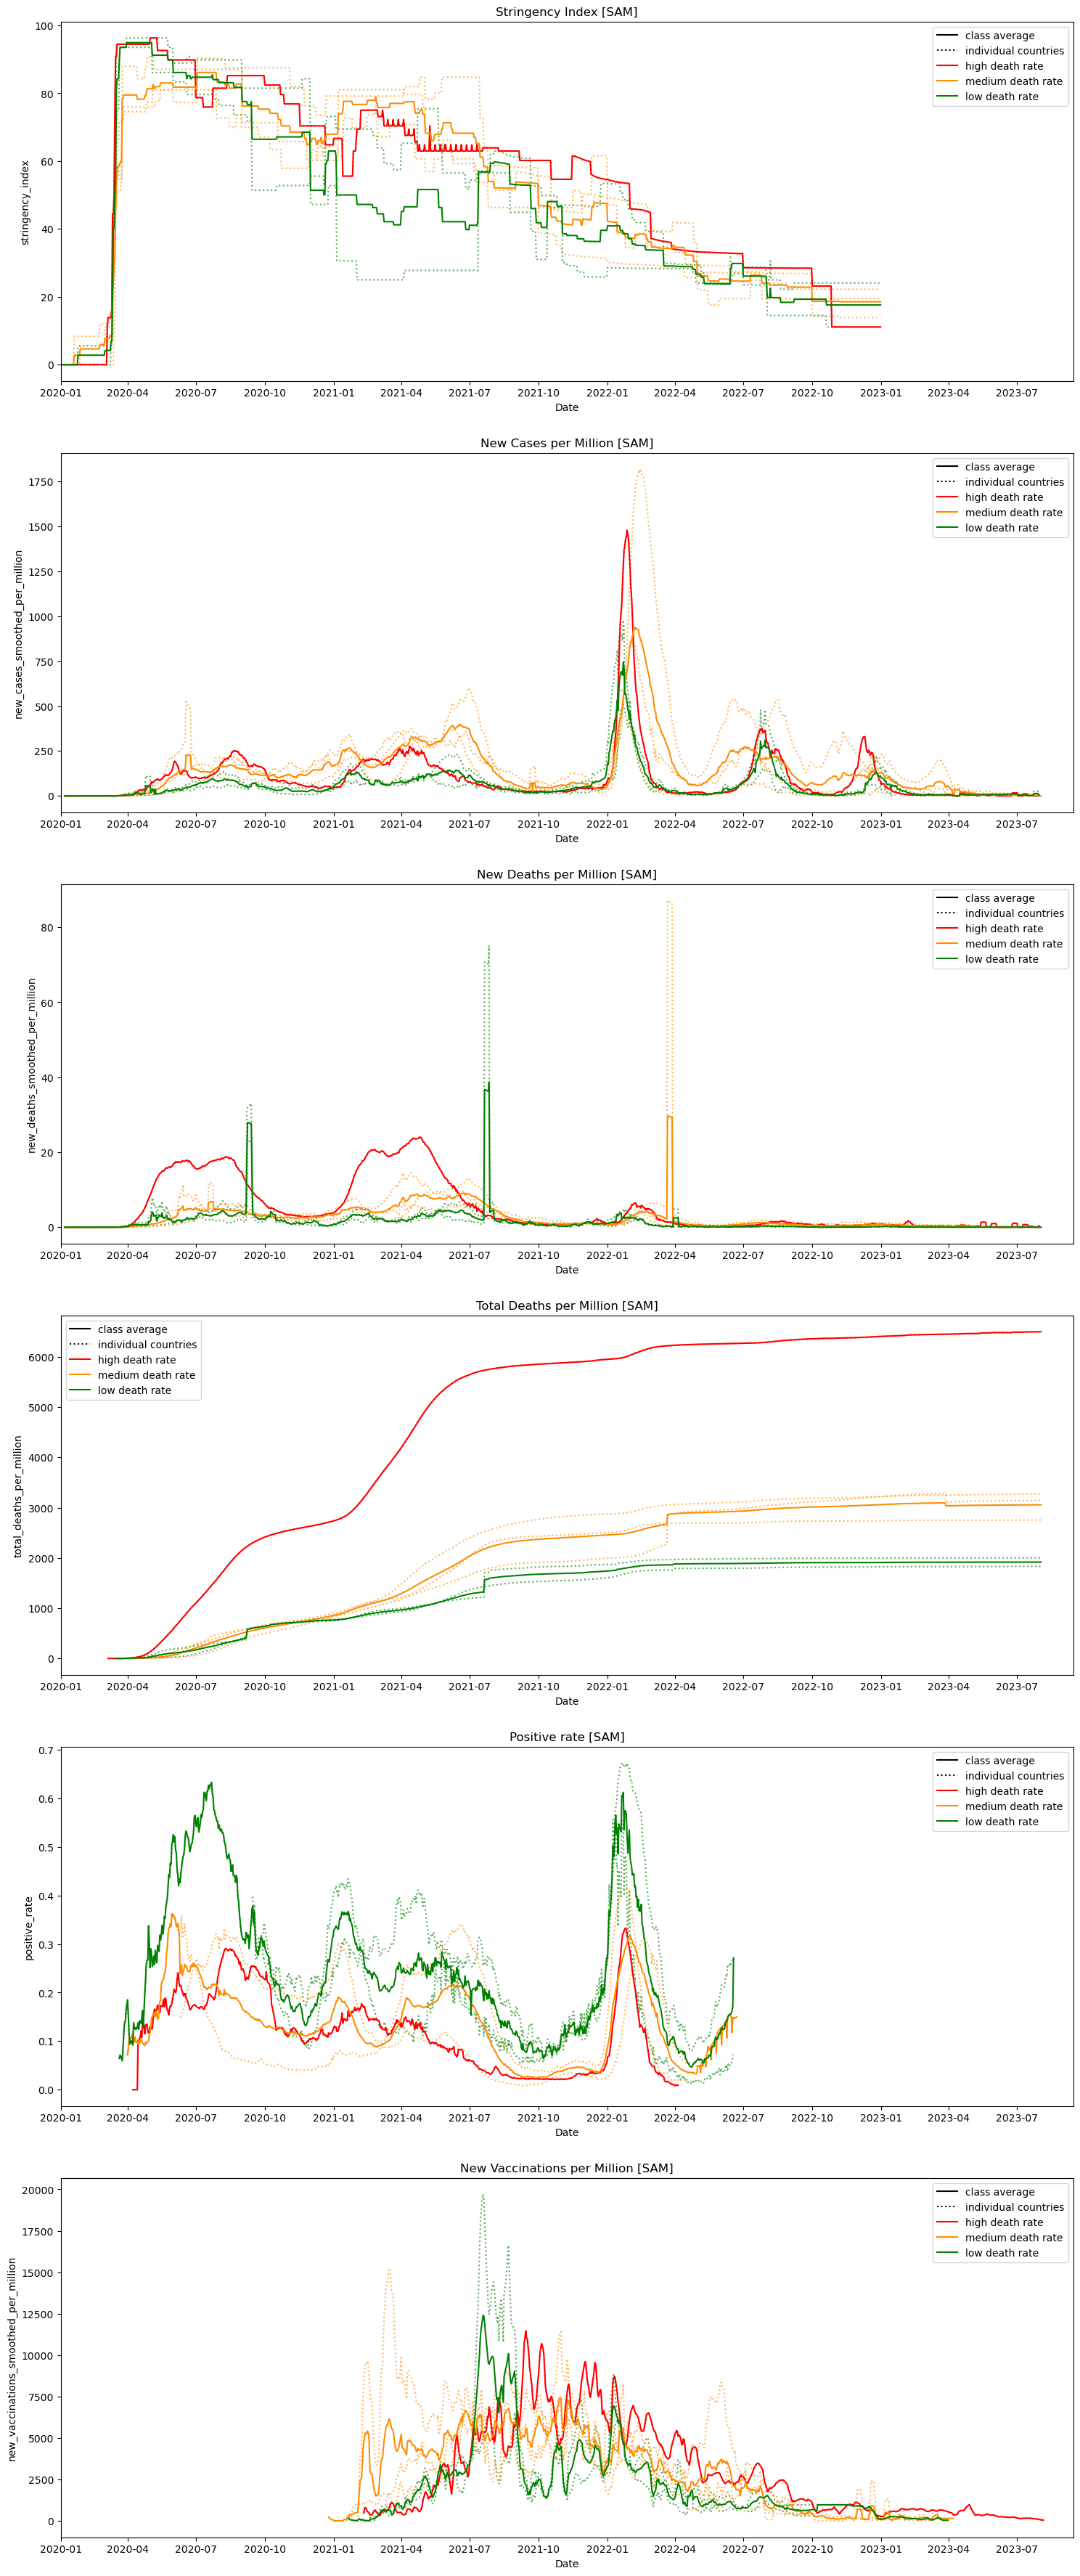

In [14]:
title = ['Stringency Index [SAM]', 'New Cases per Million [SAM]', 'New Deaths per Million [SAM]', 'Total Deaths per Million [SAM]',
        'Positive rate [SAM]','New Vaccinations per Million [SAM]']
fig, axs = plt.subplots(len(cols), 1, figsize=(18, 45))
for i in range(len(cols)):
    for j in range(len(sam_cntrs_high)):
        axs[i].plot(range(len(sam_cntry_dfs_high[j])),sam_cntry_dfs_high[j][cols[i]], color = 'red', linestyle = 'dotted', alpha = 0.65)
    for j in range(len(sam_cntrs_low)):
        axs[i].plot(range(len(sam_cntry_dfs_low[j])),sam_cntry_dfs_low[j][cols[i]], color = 'green', linestyle = 'dotted', alpha = 0.65)
    for j in range(len(sam_cntry_dfs_mid)):
        axs[i].plot(range(len(sam_cntry_dfs_mid[j])),sam_cntry_dfs_mid[j][cols[i]], color = 'darkorange', linestyle = 'dotted', alpha = 0.65)
    df_concat_high = pd.concat(tuple(sam_cntry_dfs_high))[cols[i]]
    df_concat_mid = pd.concat(tuple(sam_cntry_dfs_mid))[cols[i]]
    df_concat_low = pd.concat(tuple(sam_cntry_dfs_low))[cols[i]]
    axs[i].plot(range(len(sam_cntry_dfs_high[0])),df_concat_high.groupby(df_concat_high.index).mean(), color = 'red')
    axs[i].plot(range(len(sam_cntry_dfs_mid[0])),df_concat_mid.groupby(df_concat_mid.index).mean(), color = 'darkorange')
    axs[i].plot(range(len(sam_cntry_dfs_low[0])),df_concat_low.groupby(df_concat_low.index).mean(), color = 'green')
    axs[i].plot(0,0, color = 'black', label = 'class average')
    axs[i].plot(0,0, color = 'black',linestyle = 'dotted', label = 'individual countries')
    axs[i].plot(0,0, color = 'red', label = 'high death rate')
    axs[i].plot(0,0, color = 'darkorange', label = 'medium death rate')
    axs[i].plot(0,0, color = 'green', label = 'low death rate')
    axs[i].set_title(title[i])
    axs[i].legend()
    axs[i].set_xticks([idx for idx in x_tks], [x_tks[idx] for idx in x_tks])
    axs[i].set_xlabel('Date')
    axs[i].set_ylabel(cols[i])
    axs[i].set_xlim(0,1350)

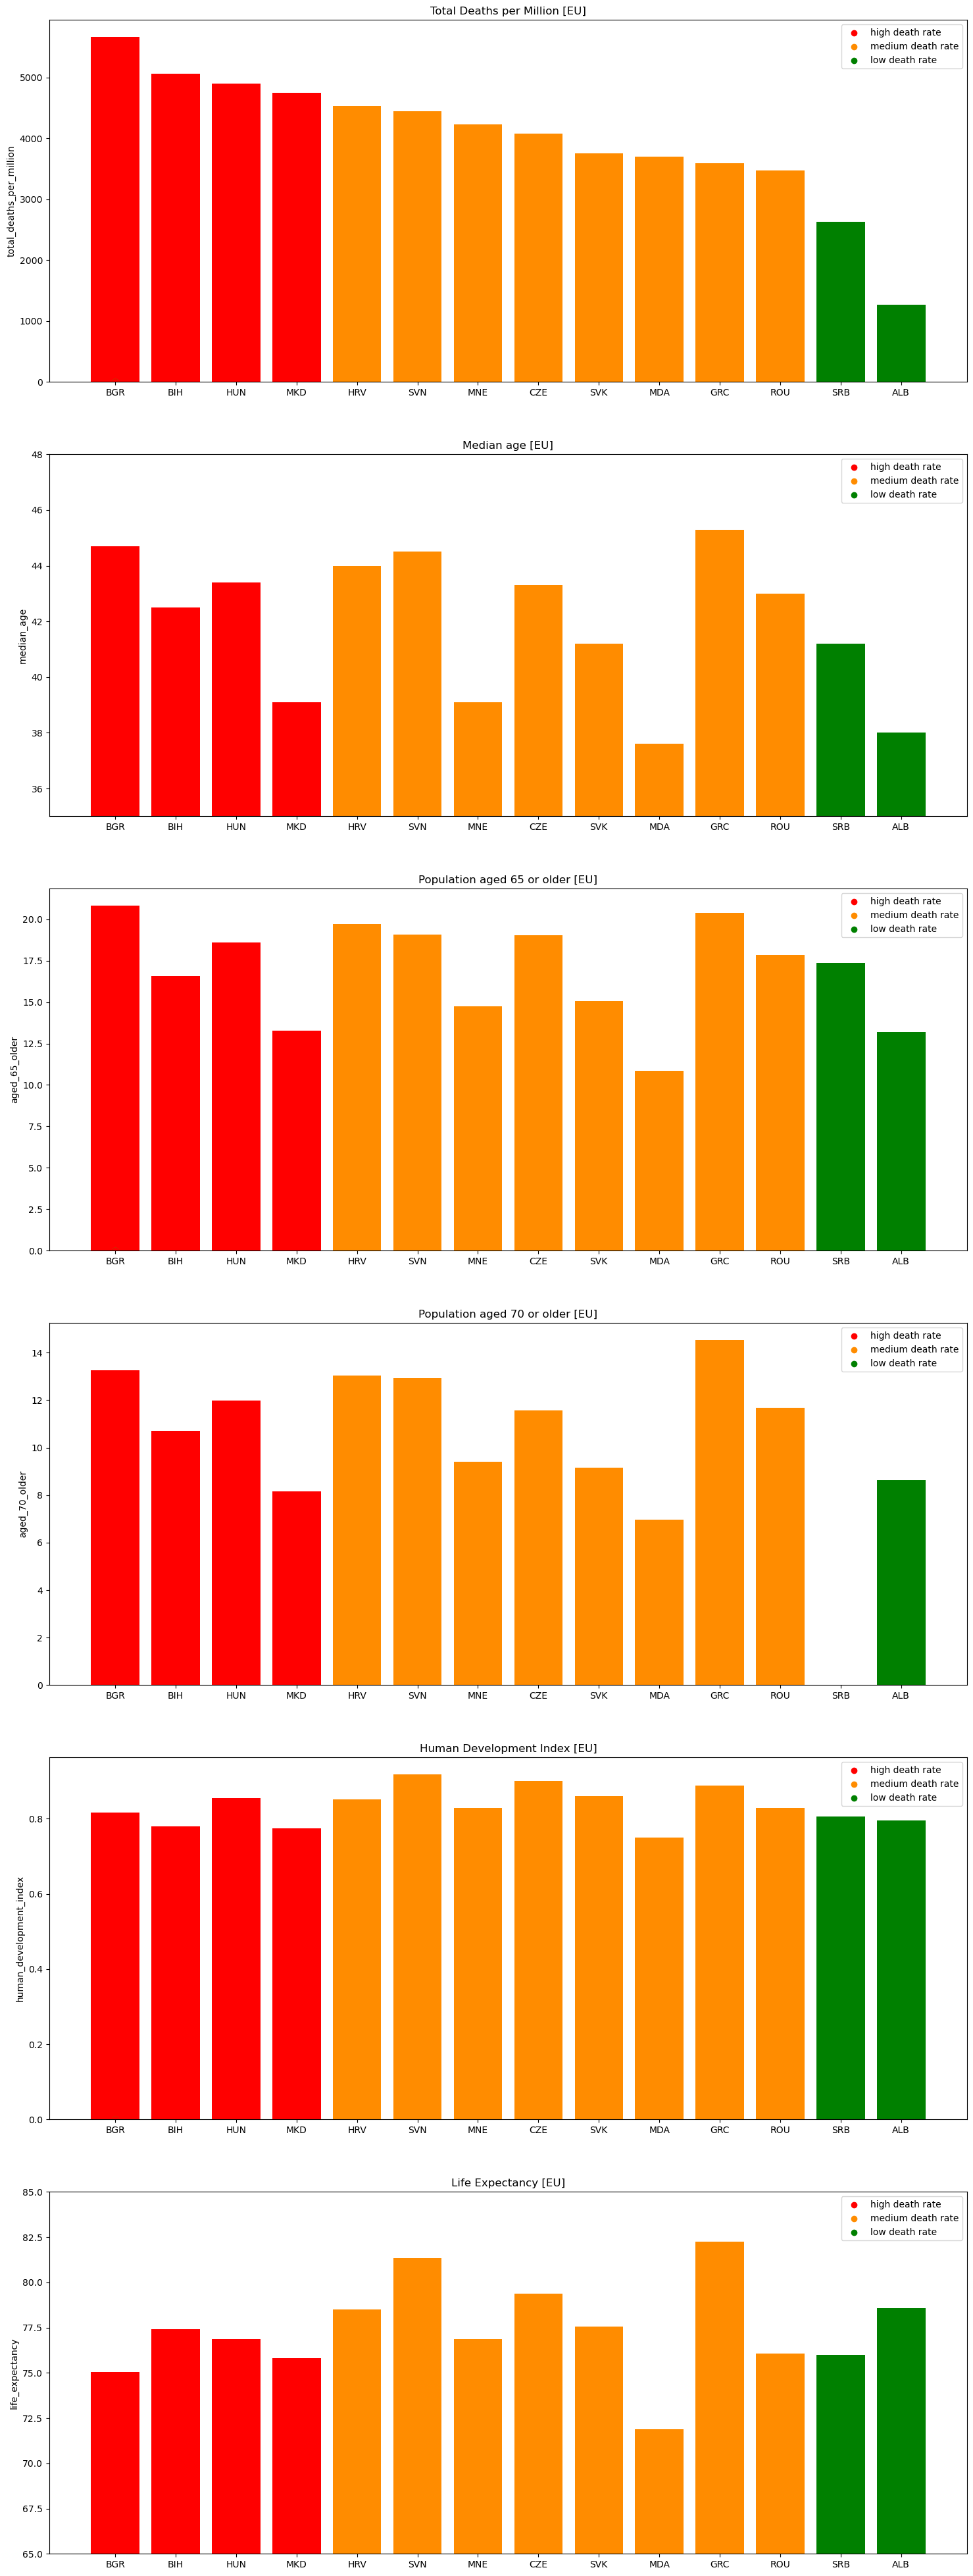

In [15]:
#cols = ['total_deaths_per_million','median_age','aged_65_older', 'aged_70_older', 'human_development_index','life_expectancy','people_vaccinated_per_hundred', 
#        'people_fully_vaccinated_per_hundred', 'population_density','gdp_per_capita','hospital_beds_per_thousand', 'total_tests_per_thousand']
#title = ['Total Deaths per Million [EU]','Median age [EU]','Population aged 65 or older [EU]', 'Population aged 70 or older [EU]', 'Human Development Index [EU]',
#         'Life Expectancy [EU]','People vaccinated per Hundred [EU]', 'People fully vaccinated per Hundred [EU]', 'Population Density [EU]','GDP per capita [EU]',
#         'Hospital Beds per Thousand [EU]','Total Tests per Thousand [EU]']
cols = ['total_deaths_per_million','median_age','aged_65_older', 'aged_70_older', 'human_development_index','life_expectancy']
title = ['Total Deaths per Million [EU]','Median age [EU]','Population aged 65 or older [EU]', 'Population aged 70 or older [EU]', 'Human Development Index [EU]','Life Expectancy [EU]']
cntry_dfs_high = eu_cntry_dfs_high
cntry_dfs_mid = eu_cntry_dfs_mid
cntry_dfs_low = eu_cntry_dfs_low
codes = eu_codes


cntry_dfs = cntry_dfs_high+cntry_dfs_mid+cntry_dfs_low
fig, axs = plt.subplots(len(cols), 1, figsize=(18, 50))
space = np.linspace(-0.5, len(cntry_dfs)-0.5, 2)
for i in range(len(cols)):
    high_vals = []
    mid_vals = []
    low_vals = []
    for j in range(len(cntry_dfs)):
        if j < len(cntry_dfs_high):
            for k in range(1,700):
                if np.isnan(cntry_dfs[j][cols[i]].iloc(0)[-k]):
                    continue
                high_vals.append(cntry_dfs[j][cols[i]].iloc(0)[-k])
                axs[i].bar(j,cntry_dfs[j][cols[i]].iloc(0)[-k],color = 'red')
                break
        elif j< len(cntry_dfs_mid)+len(cntry_dfs_high):
            for k in range(1,700):
                if np.isnan(cntry_dfs[j][cols[i]].iloc(0)[-k]):
                    continue
                mid_vals.append(cntry_dfs[j][cols[i]].iloc(0)[-k])
                axs[i].bar(j,cntry_dfs[j][cols[i]].iloc(0)[-k],color = 'darkorange')
                break
        else:
            for k in range(1,700):
                if np.isnan(cntry_dfs[j][cols[i]].iloc(0)[-k]):
                    continue
                low_vals.append(cntry_dfs[j][cols[i]].iloc(0)[-k])
                axs[i].bar(j,cntry_dfs[j][cols[i]].iloc(0)[-k],color = 'green')
                break
    axs[i].scatter(0,0,color = 'red', label = 'high death rate')
    axs[i].scatter(0,0,color = 'darkorange', label = 'medium death rate')
    axs[i].scatter(0,0,color = 'green', label = 'low death rate')   
    axs[i].scatter(0,0,color='red')
    #slope, intercept, r, p, std_err = stats.linregress(range(len(high_vals+mid_vals+low_vals)), high_vals+mid_vals+low_vals)
    #axs[i].plot(space, [slope*x + intercept for x in space], color = 'black', label = 'linear regression line')

    axs[i].set_xticks(range(len(codes)),codes)
    if cols[i] == 'life_expectancy':
        axs[i].set(ylim=(65,85))
    elif cols[i] == 'median_age':
        axs[i].set(ylim=(35,48))
    axs[i].set_ylabel(cols[i])
    axs[i].legend()
    axs[i].set_title(title[i])


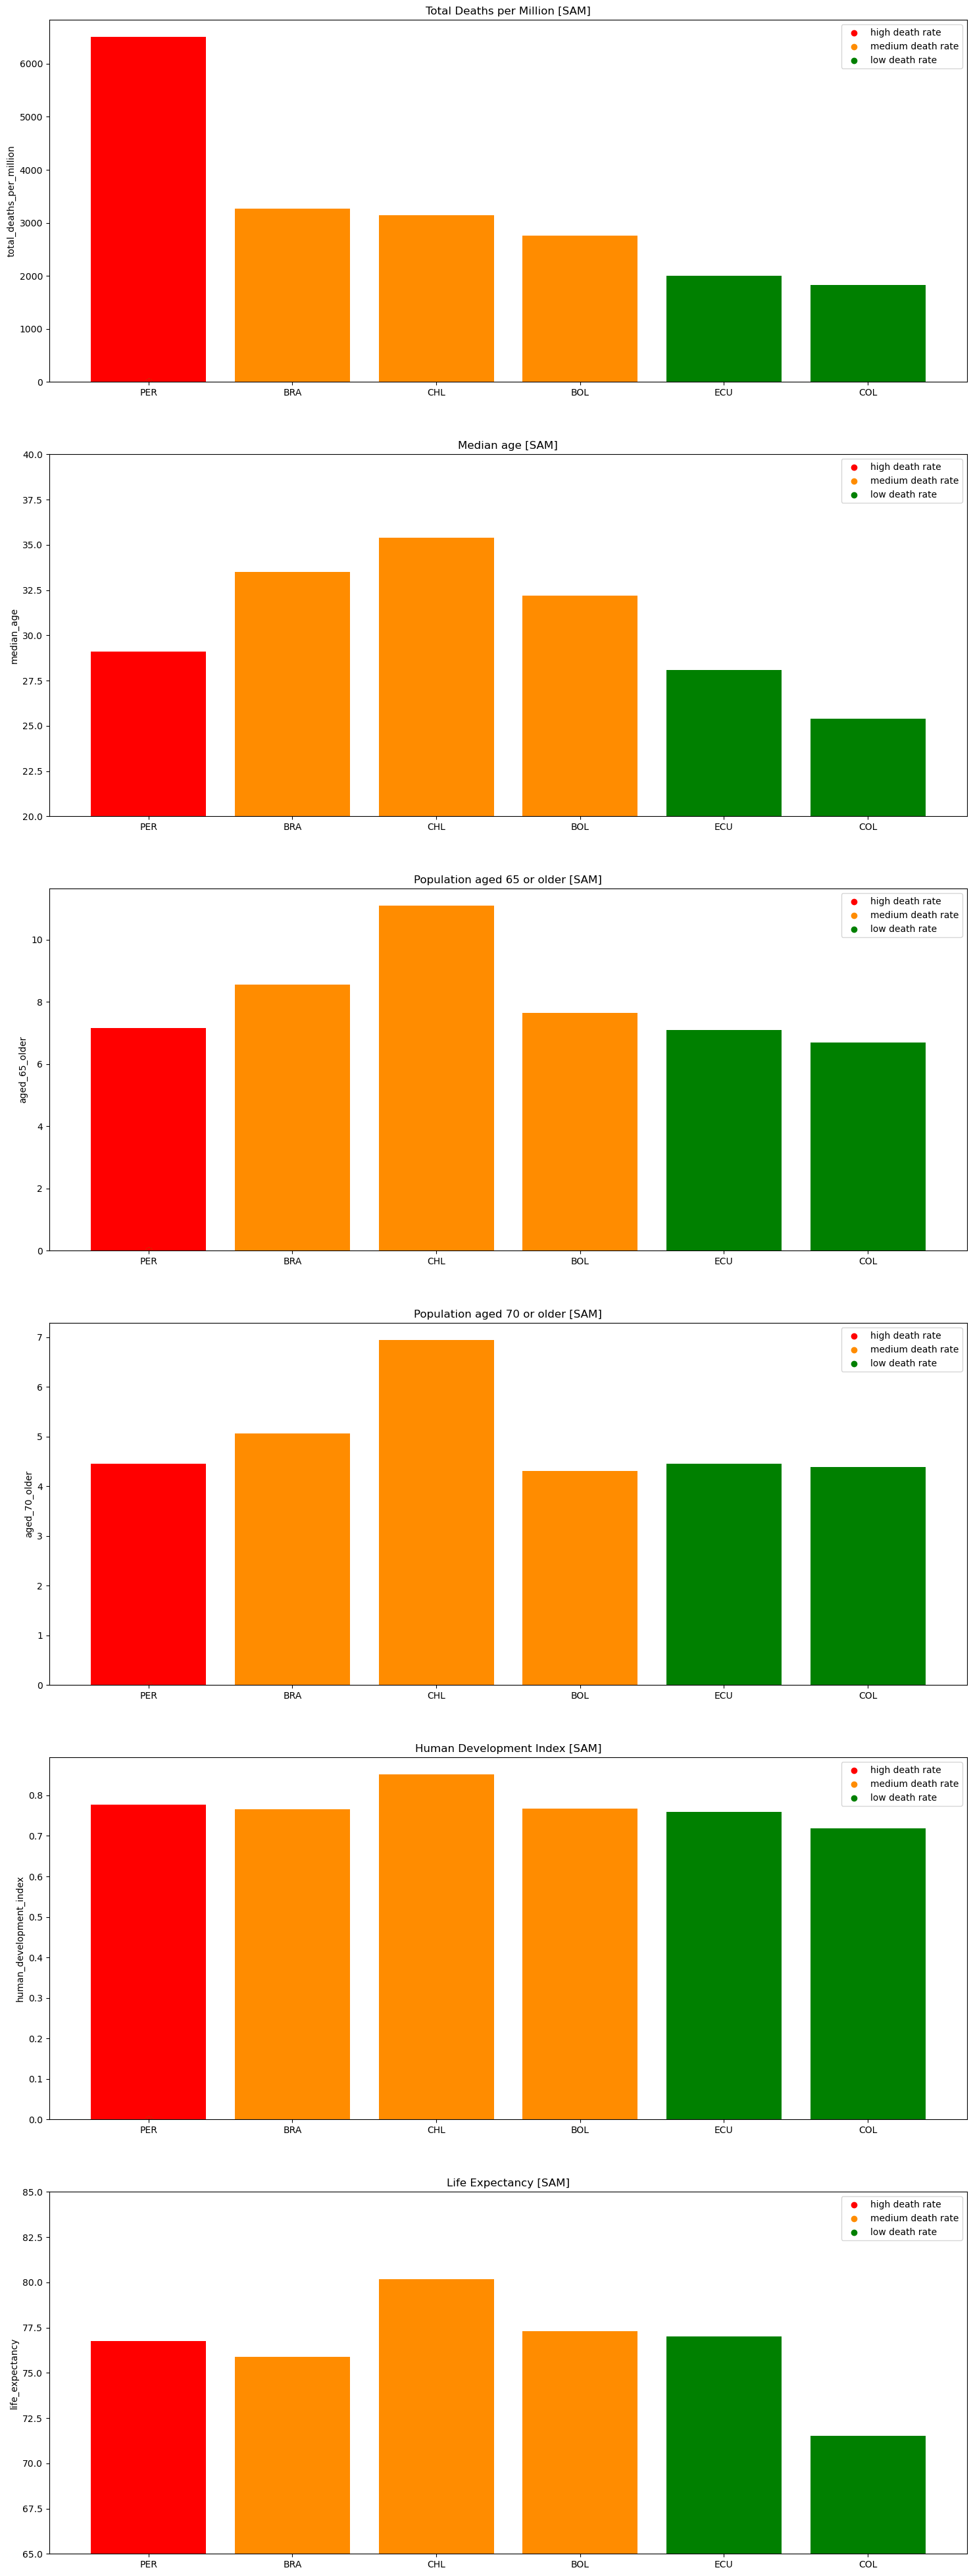

In [16]:
#cols = ['total_deaths_per_million','median_age','aged_65_older', 'aged_70_older', 'human_development_index', 'life_expectancy','people_vaccinated_per_hundred',
#        'people_fully_vaccinated_per_hundred', 'population_density','gdp_per_capita','hospital_beds_per_thousand', 'total_tests_per_thousand']
#title = ['Total Deaths per Million [SAM]','Median age [SAM]','Population aged 65 or older [SAM]', 'Population aged 70 or older [SAM]', 'Human Development Index [SAM]', 
#         'Life Expectancy [SAM]','People vaccinated per Hundred [SAM]', 'People fully vaccinated per Hundred [SAM]', 'Population Density [SAM]','GDP per capita [SAM]',
#         'Hospital Beds per Thousand [SAM]','Total Tests per Thousand [SAM]']
cols = ['total_deaths_per_million','median_age','aged_65_older', 'aged_70_older', 'human_development_index', 'life_expectancy']
title = ['Total Deaths per Million [SAM]','Median age [SAM]','Population aged 65 or older [SAM]', 'Population aged 70 or older [SAM]', 'Human Development Index [SAM]', 
         'Life Expectancy [SAM]']
cntry_dfs_high = sam_cntry_dfs_high
cntry_dfs_mid = sam_cntry_dfs_mid
cntry_dfs_low = sam_cntry_dfs_low
codes = sam_codes


cntry_dfs = cntry_dfs_high+cntry_dfs_mid+cntry_dfs_low
fig, axs = plt.subplots(len(cols), 1, figsize=(18, 50))
space = np.linspace(-0.5, len(cntry_dfs)-0.5, 2)
for i in range(len(cols)):
    high_vals = []
    mid_vals = []
    low_vals = []
    for j in range(len(cntry_dfs)):
        if j < len(cntry_dfs_high):
            for k in range(1,700):
                if np.isnan(cntry_dfs[j][cols[i]].iloc(0)[-k]):
                    continue
                high_vals.append(cntry_dfs[j][cols[i]].iloc(0)[-k])
                axs[i].bar(j,cntry_dfs[j][cols[i]].iloc(0)[-k],color = 'red')
                break
        elif j< len(cntry_dfs_mid)+len(cntry_dfs_high):
            for k in range(1,700):
                if np.isnan(cntry_dfs[j][cols[i]].iloc(0)[-k]):
                    continue
                mid_vals.append(cntry_dfs[j][cols[i]].iloc(0)[-k])
                axs[i].bar(j,cntry_dfs[j][cols[i]].iloc(0)[-k],color = 'darkorange')
                break
        else:
            for k in range(1,700):
                if np.isnan(cntry_dfs[j][cols[i]].iloc(0)[-k]):
                    continue
                low_vals.append(cntry_dfs[j][cols[i]].iloc(0)[-k])
                axs[i].bar(j,cntry_dfs[j][cols[i]].iloc(0)[-k],color = 'green')
                break
    axs[i].scatter(0,0,color = 'red', label = 'high death rate')
    axs[i].scatter(0,0,color = 'darkorange', label = 'medium death rate')
    axs[i].scatter(0,0,color = 'green', label = 'low death rate')   
    axs[i].scatter(0,0,color='red')
    #slope, intercept, r, p, std_err = stats.linregress(range(len(high_vals+mid_vals+low_vals)), high_vals+mid_vals+low_vals)
    #axs[i].plot(space, [slope*x + intercept for x in space], color = 'black', label = 'linear regression line')

    axs[i].set_xticks(range(len(codes)),codes)
    if cols[i] == 'life_expectancy':
        axs[i].set(ylim=(65,85))
    elif cols[i] == 'median_age':
        axs[i].set(ylim=(20,40))
    axs[i].set_ylabel(cols[i])
    axs[i].legend()
    axs[i].set_title(title[i])


In [17]:
sam_df = end_date_df.copy()
eu_df = end_date_df.copy()
sam_df.reset_index(inplace=True)
eu_df.reset_index(inplace=True)

i = 0
while i < len(end_date_df):
    if sam_df.loc[i]['iso_code'] not in sam_codes:
        sam_df.drop(i, axis = 0,inplace=True)
    i += 1
                           
i = 0
while i < len(end_date_df):
    if eu_df.loc[i]['iso_code'] not in eu_codes:
        eu_df.drop(i, axis = 0,inplace=True)
    i += 1   

sam_df = sam_df.drop(columns = ['iso_code','continent','location','date'])
sam_df.fillna(sam_df.mean(), inplace=True)
sam_2_df = sam_df[['total_deaths_per_million','total_cases','total_cases_per_million','total_tests_per_thousand','positive_rate','tests_per_case','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy','human_development_index','population']]         
eu_df = eu_df.drop(columns = ['iso_code','continent','location','date'])
eu_df.fillna(eu_df.mean(), inplace=True)
eu_2_df = eu_df[['total_deaths_per_million','total_cases','total_cases_per_million','total_tests_per_thousand','positive_rate','tests_per_case','total_vaccinations_per_hundred','people_vaccinated_per_hundred','people_fully_vaccinated_per_hundred','population_density','median_age','aged_65_older','aged_70_older','gdp_per_capita','extreme_poverty','cardiovasc_death_rate','diabetes_prevalence','female_smokers','male_smokers','handwashing_facilities','hospital_beds_per_thousand','life_expectancy','human_development_index','population']]         


cor_matrix_sam = sam_2_df.corr()
cor_matrix_eu = eu_2_df.corr()
sam_features = (np.abs(cor_matrix_sam['total_deaths_per_million']).sort_values(ascending = False).head(6))
eu_features = (np.abs(cor_matrix_eu['total_deaths_per_million']).sort_values(ascending = False).head(6))

print(sam_features)
print(eu_features)

sam_params = list(sam_features.index[1:])
eu_params = list(eu_features.index[1:])


total_deaths_per_million    1.000000
cardiovasc_death_rate       0.723739
extreme_poverty             0.342482
human_development_index     0.279291
life_expectancy             0.268343
population_density          0.238284
Name: total_deaths_per_million, dtype: float64
total_deaths_per_million               1.000000
median_age                             0.470160
aged_65_older                          0.388129
total_vaccinations_per_hundred         0.386268
female_smokers                         0.386182
people_fully_vaccinated_per_hundred    0.385709
Name: total_deaths_per_million, dtype: float64


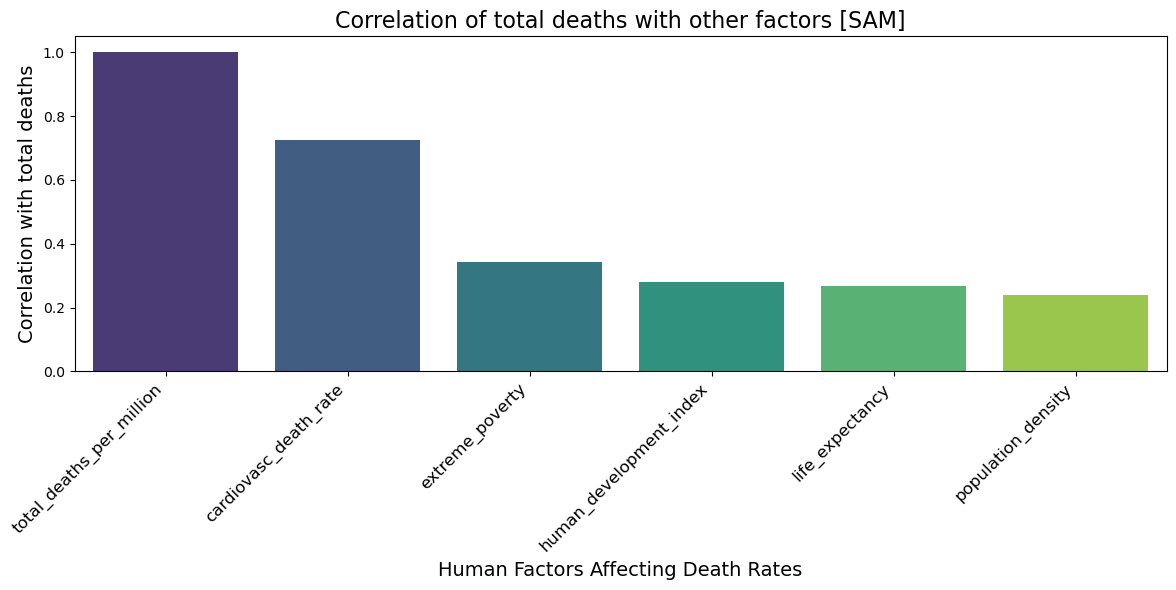

In [18]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=sam_features.index, y=sam_features.values, palette='viridis')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Human Factors Affecting Death Rates', fontsize=14)
plt.ylabel('Correlation with total deaths', fontsize=14)
plt.title('Correlation of total deaths with other factors [SAM]', fontsize=16)
plt.tight_layout() 
plt.show()

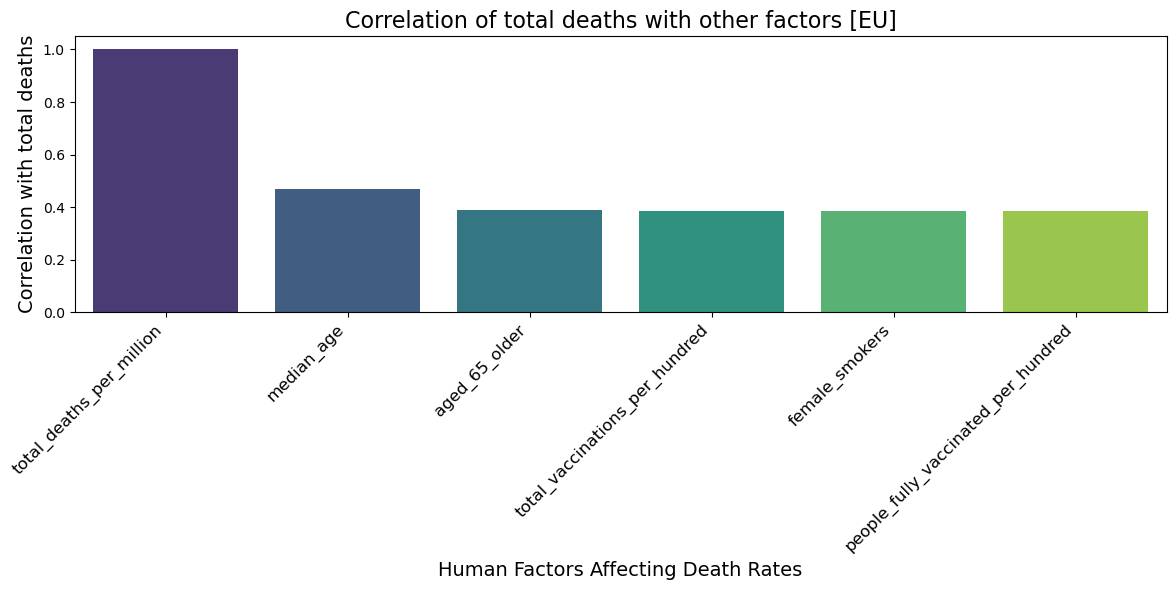

In [19]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=eu_features.index, y=eu_features.values, palette='viridis')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.xlabel('Human Factors Affecting Death Rates', fontsize=14)
plt.ylabel('Correlation with total deaths', fontsize=14)
plt.title('Correlation of total deaths with other factors [EU]', fontsize=16)
plt.tight_layout() 
plt.show()

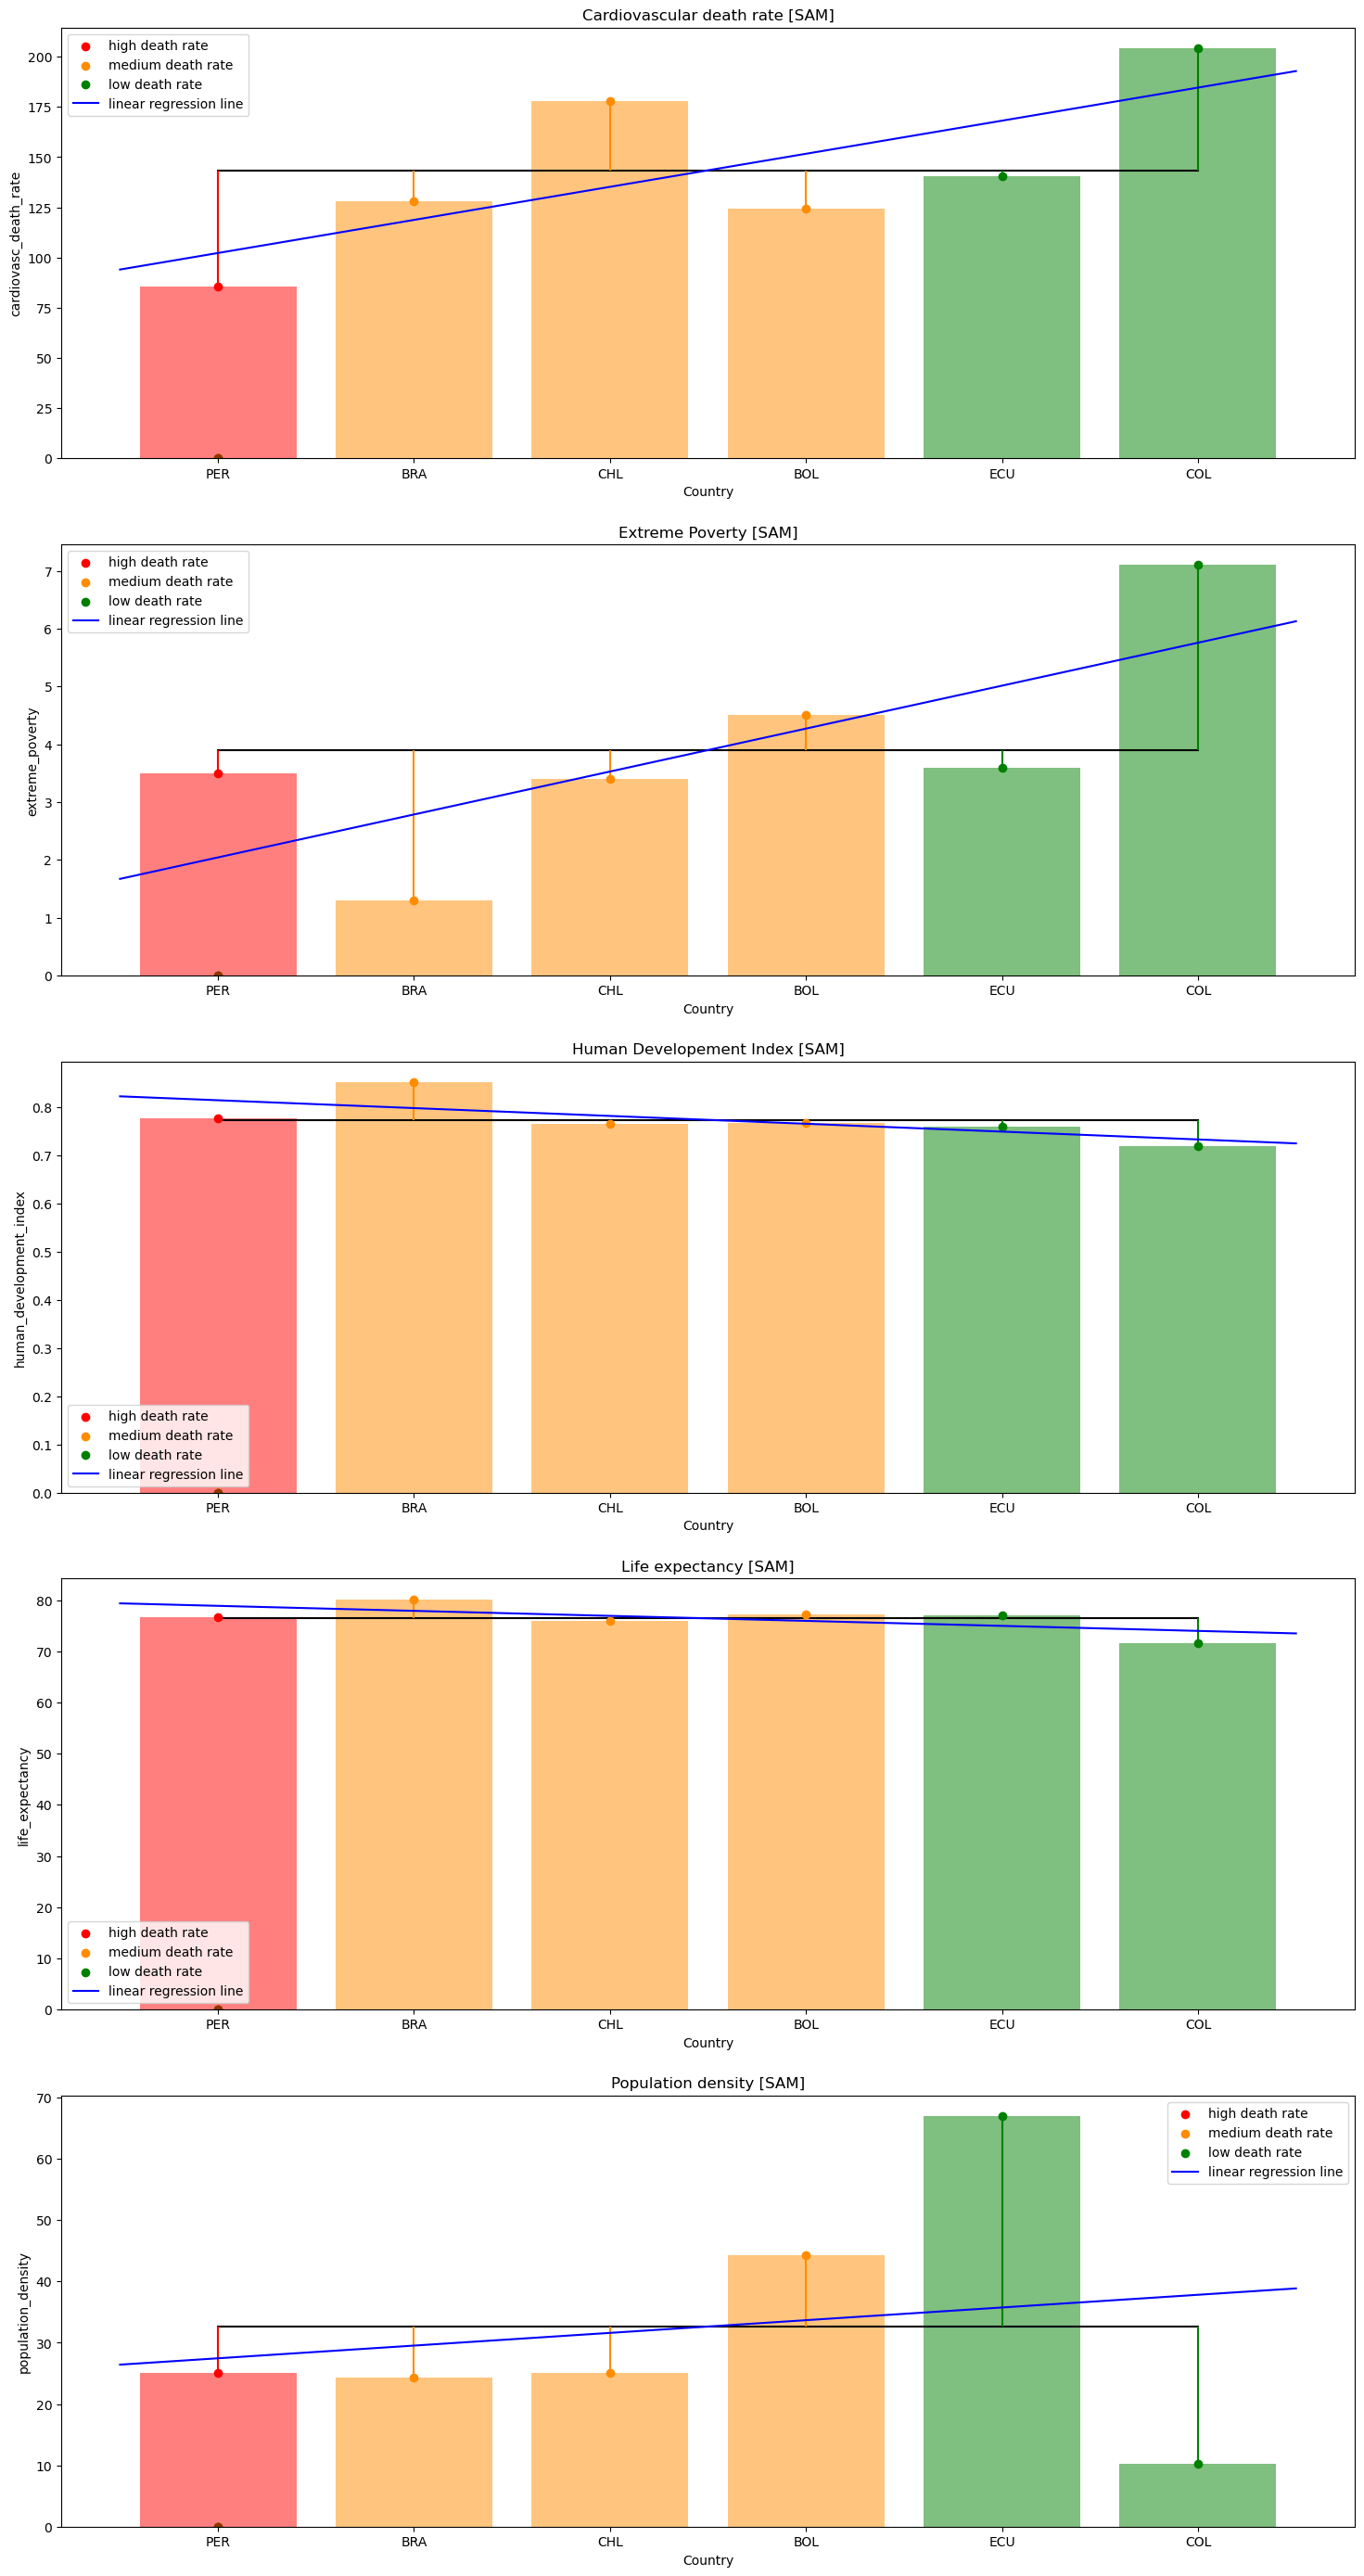

/opt/conda/lib/python3.10/site-packages/matplotlib/axes/_base.py:2503: UserWarning: Warning: converting a masked element to nan.
  xys = np.asarray(xys)


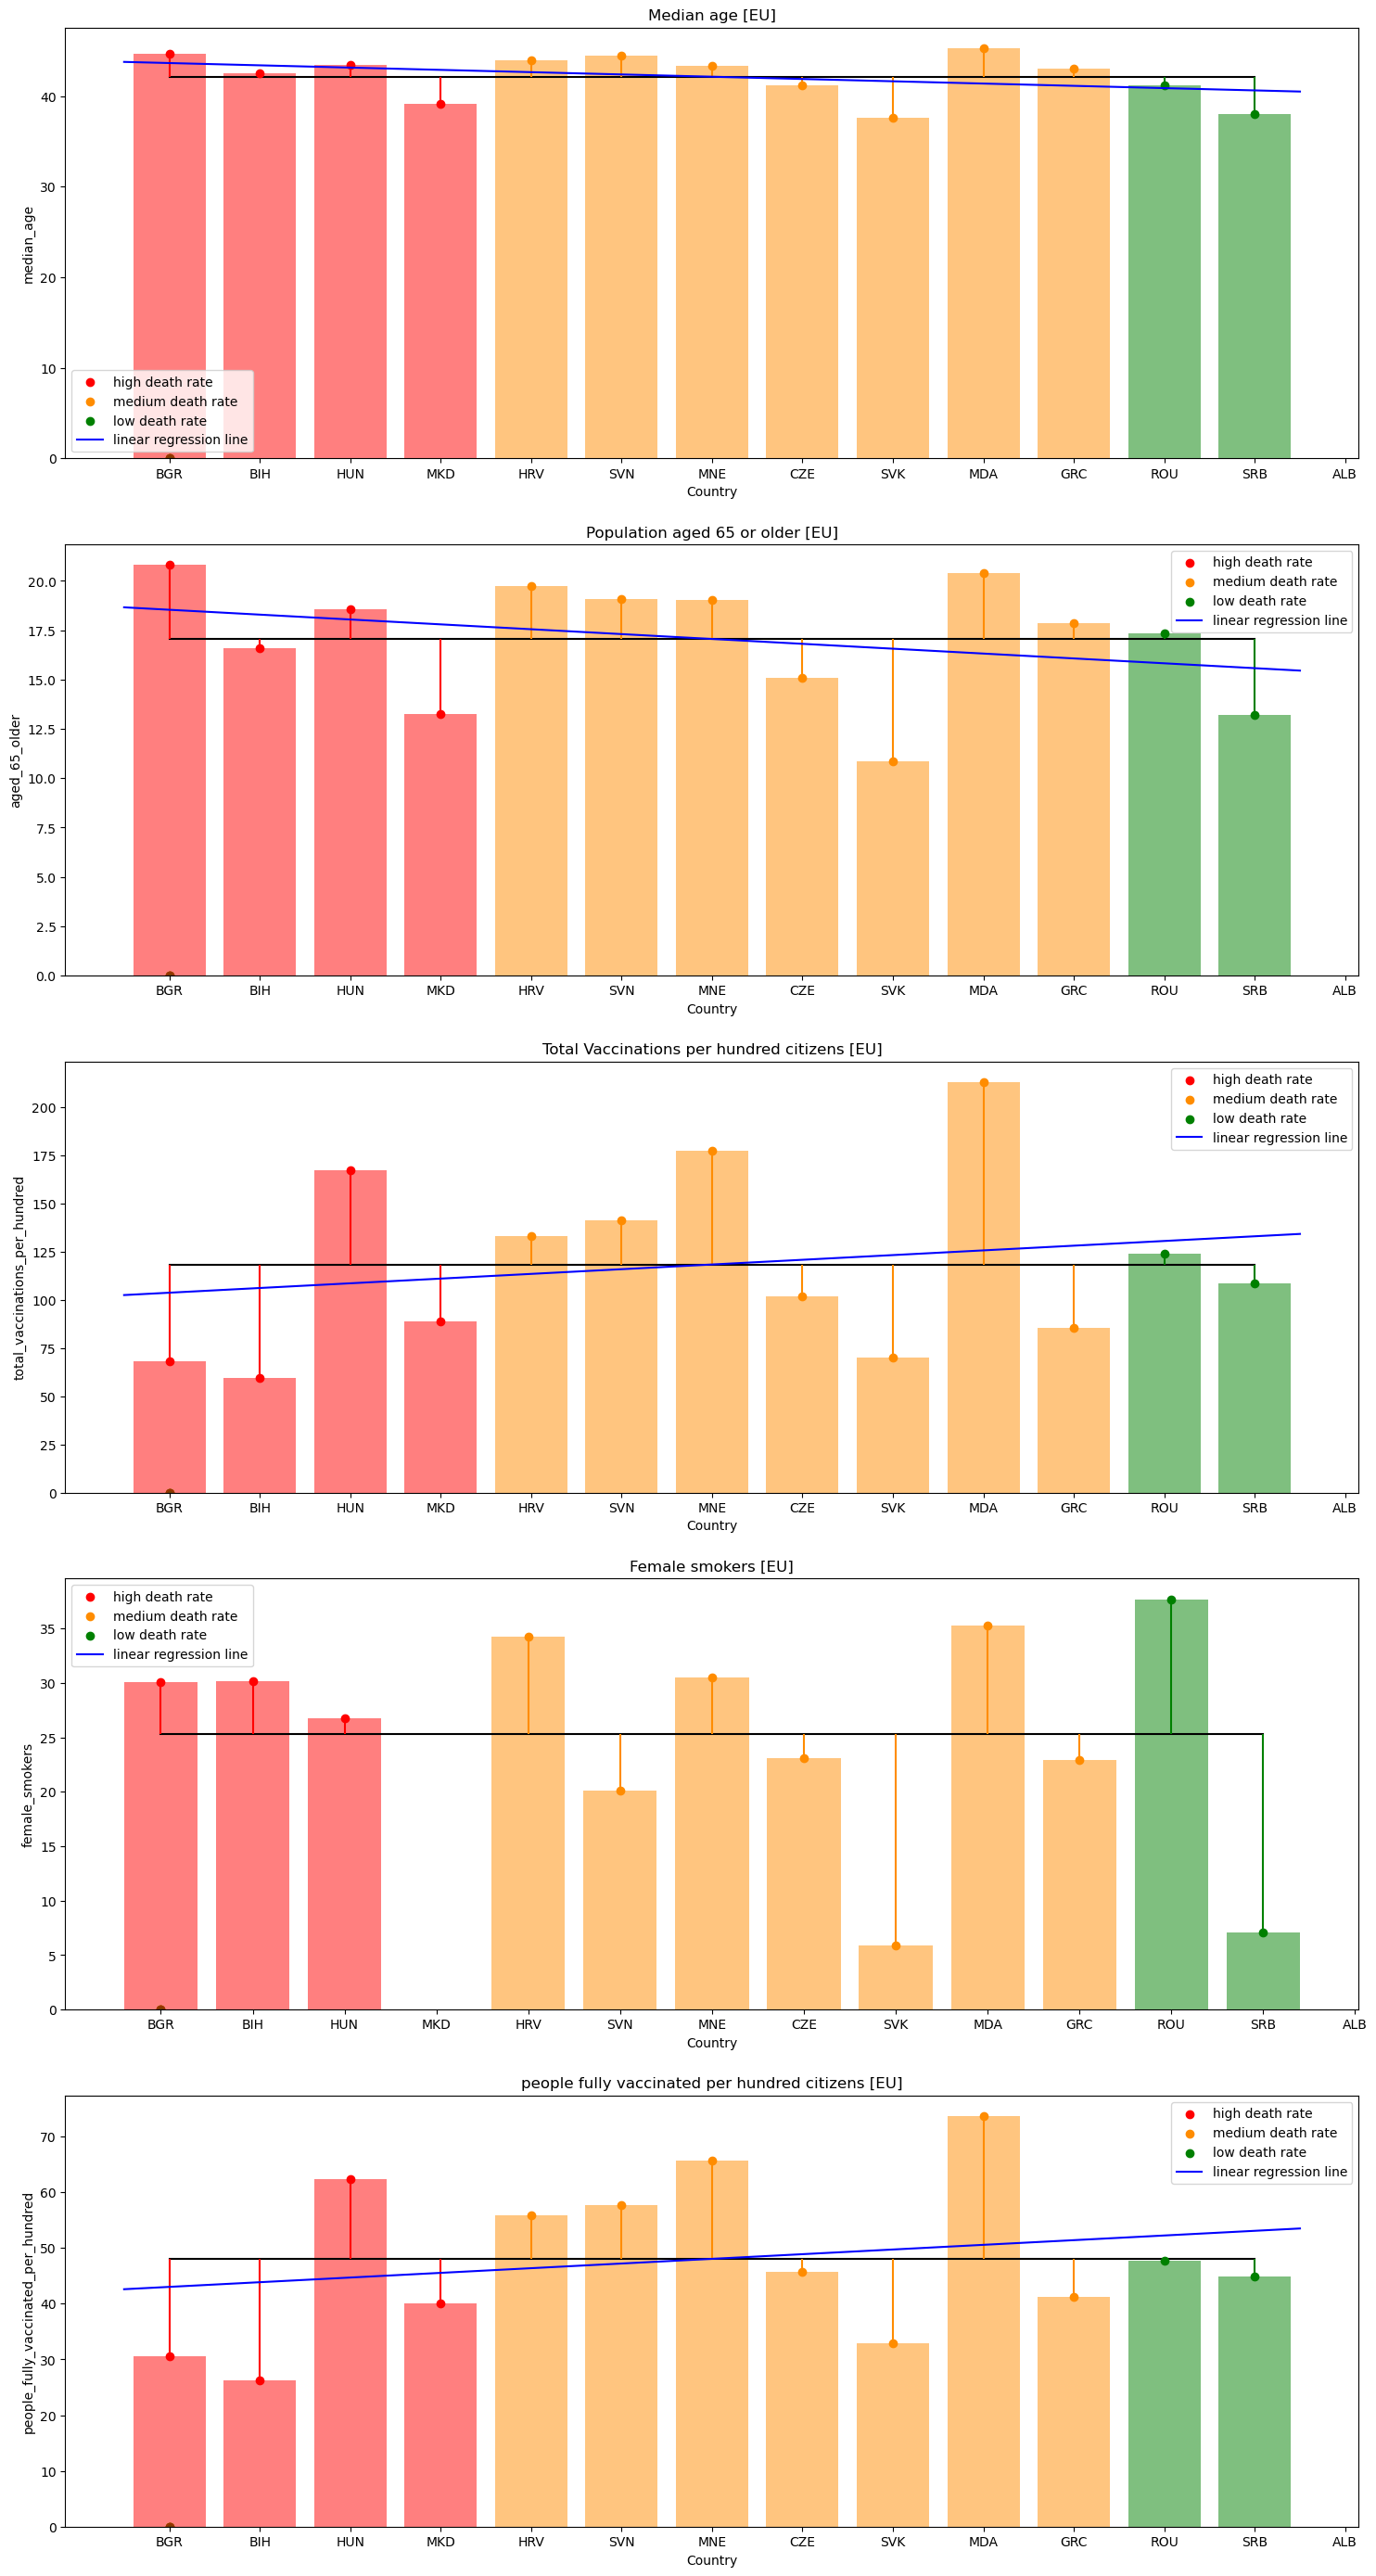

In [20]:
row_lst = [sam_params,eu_params]
cntry_lst = [[[per_df],[chl_df,bra_df,col_df],[ecu_df,bol_df]],[[bgr_df,bih_df,hun_df,mkd_df],[hrv_df,svn_df,cze_df,svk_df,mda_df,grc_df,rou_df],[srb_df,alb_df]]]
codes = (sam_codes,eu_codes)
space = np.linspace(-0.5, len(cntry_dfs)-0.5, 2)
title = [['Cardiovascular death rate [SAM]','Extreme Poverty [SAM]','Human Developement Index [SAM]','Life expectancy [SAM]','Population density [SAM]'],['Median age [EU]','Population aged 65 or older [EU]','Total Vaccinations per hundred citizens [EU]','Female smokers [EU]','people fully vaccinated per hundred citizens [EU]']]
for rows,cntry_dfs_lst,code_lst, ttle in zip(row_lst, cntry_lst,codes,title):
    space = np.linspace(-0.5, len(cntry_dfs_lst)-0.5, 2)

    cntry_dfs_high = cntry_dfs_lst[0]
    cntry_dfs_mid = cntry_dfs_lst[1]
    cntry_dfs_low = cntry_dfs_lst[2]
    cntry_dfs =  cntry_dfs_high+cntry_dfs_mid+cntry_dfs_low
    space = np.linspace(-0.5, len(cntry_dfs)-0.5, 2)
    fig, axs = plt.subplots(len(rows), 1, figsize=(18, 35))
    vals = []
    vals_none = []
    for i in range(len(rows)):
        vals.append([])
        vals_none.append([])
        for j in range(len(cntry_dfs)):
            Found = False
            
            if j < len(cntry_dfs_high):
                for k in range(1,700):
                    if np.isnan(cntry_dfs[j][rows[i]].iloc(0)[-k]):
                        continue
                    axs[i].bar(j,cntry_dfs[j][rows[i]].iloc(0)[-k],color = 'red', alpha = 0.5)
                    vals[i].append(cntry_dfs[j][rows[i]].iloc(0)[-k])
                    vals_none[i].append(cntry_dfs[j][rows[i]].iloc(0)[-k])
                    Found = True
                    break
                if not Found:
                     vals_none[i].append(cntry_dfs[j][rows[i]].iloc(0)[-k])
            elif j< len(cntry_dfs_mid)+len(cntry_dfs_high):
                for k in range(1,700):
                    if np.isnan(cntry_dfs[j][rows[i]].iloc(0)[-k]):
                        continue
                    axs[i].bar(j,cntry_dfs[j][rows[i]].iloc(0)[-k],color = 'darkorange', alpha = 0.5)
                    vals[i].append(cntry_dfs[j][rows[i]].iloc(0)[-k])
                    vals_none[i].append(cntry_dfs[j][rows[i]].iloc(0)[-k])
                    Found = True
                    break
                if not Found:
                     vals_none[i].append(cntry_dfs[j][rows[i]].iloc(0)[-k])
            else:
                for k in range(1,700):
                    if np.isnan(cntry_dfs[j][rows[i]].iloc(0)[-k]):
                        continue
                    axs[i].bar(j,cntry_dfs[j][rows[i]].iloc(0)[-k],color = 'green', alpha = 0.5)
                    vals[i].append(cntry_dfs[j][rows[i]].iloc(0)[-k])
                    vals_none[i].append(cntry_dfs[j][rows[i]].iloc(0)[-k])
                    Found = True
                    break
                if not Found:
                    vals_none[i].append(cntry_dfs[j][rows[i]].iloc(0)[-k])
    
        axs[i].plot(range(len(cntry_dfs)), np.ones(len(cntry_dfs))*np.mean(vals[i]), color = 'black')
        for j in range(len(cntry_dfs)):
            if j < len(cntry_dfs_high):
                axs[i].stem(j,vals_none[i][j],linefmt = 'red', bottom = np.mean(vals[i]))
            elif j < len(cntry_dfs_high)+len(cntry_dfs_mid):
                axs[i].stem(j,vals_none[i][j],linefmt = 'darkorange', bottom = np.mean(vals[i]))
            else:
                axs[i].stem(j,vals_none[i][j],linefmt = 'green', bottom = np.mean(vals[i]))
                
        axs[i].scatter(0,0,color = 'red', label = 'high death rate')
        axs[i].scatter(0,0,color = 'darkorange', label = 'medium death rate')
        axs[i].scatter(0,0,color = 'green', label = 'low death rate')   
        axs[i].scatter(0,0,color='red',alpha=0.5)
        slope, intercept, r, p, std_err = stats.linregress(range(len(vals_none[i])), vals_none[i])
        axs[i].plot(space, [slope*x + intercept for x in space], color = 'blue',label = 'linear regression line')
        axs[i].set_ylabel(rows[i])
        axs[i].set_xlabel('Country')
        axs[i].set_title(ttle[i])

        axs[i].legend()
        
        axs[i].set_xticks(range(len(code_lst)), code_lst)
    plt.show()